# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Approved
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant per month
* **CoapplicantIncome:** Income of the co-applicant per month
* **LoanAmount:** Loan amount requested in *1000 dollars
* **Loan_Amount_Term:** Term of the loan in months
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [3]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not_Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# check the number of rows and observations
df.shape

(614, 13)

<Axes: xlabel='Loan_Approved'>

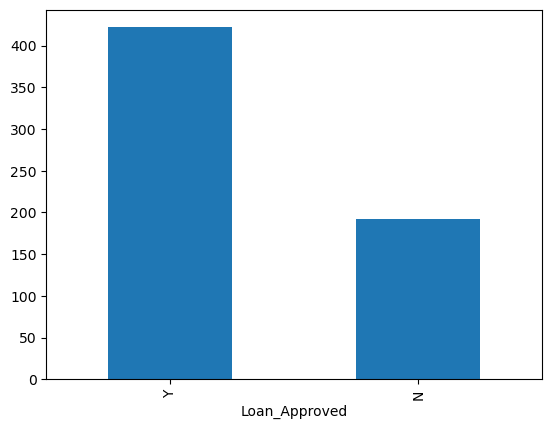

In [5]:
# How many application were approved and how many were denied?
df['Loan_Approved'].value_counts().plot.bar()

422 people (around 69%) out of 614 were approved for loan

### Missing value imputation

In [12]:
# check for missing values in each variable
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Approved         0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputate using mean or median
* For categorical variables: imputate using mode

For e.g.
In the `Loan_Amount_Term` variable, the value of 360 is repeating the most.

You can check that by using `train['Loan_Amount_Term'].value_counts()`

So you will replace the missing values in this variable using the mode of this variable. i.e. 360



For the `LoanAmount` variable, check if the variable has ouliers by plotting a box plot. If there are outliers use the median to fill the null values since mean is highly affected by the presence of outliers. If there are no outliers use mean to impute missing values in `LoanAmount'

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Approved         object
dtype: object

In [18]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [20]:
df['Dependents'].mode()[0]

0.0

<Axes: xlabel='LoanAmount', ylabel='Density'>

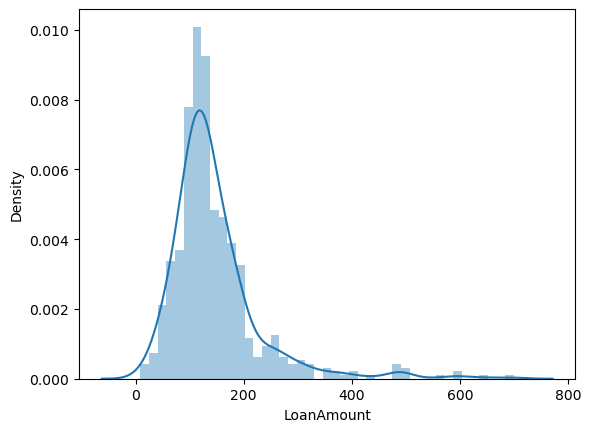

In [22]:
sns.distplot(df['LoanAmount'])

In [23]:
# convert columns to object type
df['Credit_History'] = df['Credit_History'].astype('object')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')

In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Approved         object
dtype: object

In [28]:
df['Married'].mode()[0]

'Yes'

In [30]:
# impute all missing values in all the features
#Categorical variables
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

#Numerical variable
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [32]:
# Confirm if there are any missing values left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Approved        0
dtype: int64

### Data Prep

In [35]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)

In [37]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [39]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Approved         object
dtype: object

In [41]:
raw = df.copy()

In [43]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
count,614,614,614.000000,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,NaN,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,0.744300,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,1.009623,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [45]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [47]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area'], dtype=int)
df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [49]:
# replace values in Loan_approved column
df['Loan_Approved'] = df['Loan_Approved'].replace({'Y':1, 'N':0})
df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [51]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [54]:
# Seperate the input features and target variable
x = df.drop('Loan_Approved',axis=1)
y = df.Loan_Approved

In [57]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)

In [58]:
df.shape

(614, 21)

In [61]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((491, 20), (123, 20), (491,), (123,))

In [63]:
# scale the data using min-max scalar
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [65]:
xtrain.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
226,4735,0.0,138.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
478,16667,2250.0,86.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0


In [67]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest)

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [72]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(xtrain_scaled, ytrain)

In [74]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8292682926829268

In [76]:
ypred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [78]:
ytest

475    1
486    0
451    1
380    1
548    0
      ..
177    0
405    1
116    1
399    0
465    1
Name: Loan_Approved, Length: 123, dtype: int64

In [80]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[18, 20],
       [ 1, 84]], dtype=int64)

In [82]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest_scaled)

In [84]:
pypred

array([[0.18910419, 0.81089581],
       [0.91368686, 0.08631314],
       [0.18780324, 0.81219676],
       [0.09253334, 0.90746666],
       [0.84401962, 0.15598038],
       [0.19794854, 0.80205146],
       [0.77143727, 0.22856273],
       [0.19919297, 0.80080703],
       [0.16618133, 0.83381867],
       [0.88718209, 0.11281791],
       [0.11816029, 0.88183971],
       [0.42740608, 0.57259392],
       [0.25274422, 0.74725578],
       [0.1453116 , 0.8546884 ],
       [0.386234  , 0.613766  ],
       [0.24959267, 0.75040733],
       [0.28744453, 0.71255547],
       [0.0759121 , 0.9240879 ],
       [0.09499789, 0.90500211],
       [0.29375693, 0.70624307],
       [0.86125697, 0.13874303],
       [0.20430167, 0.79569833],
       [0.22862827, 0.77137173],
       [0.91177224, 0.08822776],
       [0.83989912, 0.16010088],
       [0.78145109, 0.21854891],
       [0.28546798, 0.71453202],
       [0.13717673, 0.86282327],
       [0.09151639, 0.90848361],
       [0.12905509, 0.87094491],
       [0.

In [86]:
# to change the default threshold and to make it 70% and above
proba_pred = (pypred[:, 1] >= 0.7).astype(int)

In [88]:
accuracy_score(proba_pred, ytest)

0.7235772357723578

## <font color='chocolate'>**2. Random Forest**

In [92]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is Max_depth. Let's try - 3, 4

In [97]:
xtrain.shape

(491, 20)

### Hyperparameter Tuning

In [114]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.8292682926829268 

[[17 21]
 [ 0 85]]


In [102]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.00748292, 0.04246372, 0.00935875, 0.        , 0.87770664,
       0.        , 0.        , 0.06298797, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Cross Validation

In [106]:
# import rquired libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# if you have a imbalanced dataset, you can use stratifiedKFold
from sklearn.model_selection import StratifiedKFold

### For Logistic Regression

In [ ]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
lr_scores = cross_val_score(lrmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", lr_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())


### For Random Forest

In [ ]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


### Note:

1. By using cross-validation, we can get a better estimate of the performance of the model than by using a single train-test split. This is because cross-validation uses all the data for training and testing, and averages the results over multiple iterations, which helps to reduce the impact of random variations in the data.
<br><br>
2. **StratifiedKFold** is a variation of KFold that preserves the proportion of samples for each class in each fold. This is important when the target variable is imbalanced, i.e., when some classes have many more samples than others. By preserving the class proportions in each fold, StratifiedKFold ensures that each fold is representative of the overall dataset and helps to avoid overfitting or underfitting on specific classes.